In [1]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
import threading as tr

In [3]:
# Вариант 1
# Начальные данные:
x = [0.17453, 0.5236, 0.87267, 1.22173, 1.5708, 1.91986, 2.26893]
y = [0.00162, 0.00252, 0.00498, 0.0129, 0.03964, 0.1207, 0.34097]

Roma+0la


In [4]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

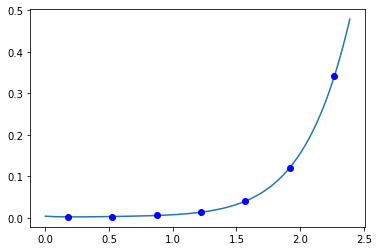

0.037045038291508264


In [5]:
x = np.array(x)
y = np.array(y)
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(0, 2.4, 0.01)
y_new = newton_poly(a_s, x, x_new)

fig, ax = plt.subplots()
ax.plot(x_new, y_new)
ax.plot(x, y, 'bo')
plt.show()

print(newton_poly(a_s, x, 1.55))


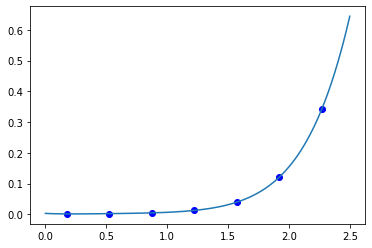

In [7]:
f = CubicSpline(x_new, y_new)
print(f)
x_new = np.linspace(0, 2.5, 100)
y_new = f(x_new)
Fig_2 = plt.subplot()
Fig_2.plot(x, y,'bo')
Fig_2.plot(x_new, y_new)
plt.show()

0.0031226485154799795 -0.016023195955420393 0.051939338594849074 -0.0588493470338851 0.026546727555321226
0.1327864755980943


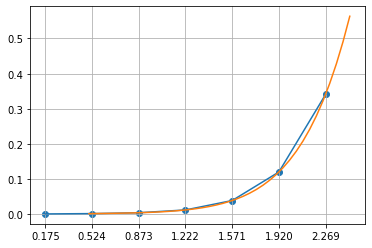

           0          1          2         3
0   0.002901  -0.012636   0.034149 -0.021783
1  -0.002420   0.017850  -0.024075  0.015283
2  -0.027053   0.102533  -0.121115  0.052350
3  -0.094647   0.268511  -0.256969  0.089416
4   2.843976  -4.853279   2.691361 -0.469967
5  32.533439 -46.961160  22.392065 -3.502935


In [ ]:
import main4a as m
print(m.return_cofficient())